# Term Project Milestone #5

In [2]:
# Load each dataframe into SQL Lite as an individual table

# Import library
import pandas as pd

# Use pandas.read_csv to load each dataset
df1_covid = pd.read_csv('Downloads/cleanedcoviddf.csv')
df2_wiki = pd.read_csv('Downloads/cleanedwikipediadf.csv')
df3_api = pd.read_csv('Downloads/cleanedapidf.csv')

In [3]:
# Import library
import sqlite3

# Create SQL Lite database connection and load all 3 dataframes to SQL using the to_sql() function
connect = sqlite3.connect('termproject.db')
cursor = connect.cursor()
df1_covid.to_sql('cleanedcoviddf', connect, index=False, if_exists='replace')
df2_wiki.to_sql('cleanedwikipediadf', connect, index=False, if_exists='replace')
df3_api.to_sql('cleanedapidf', connect, index=False, if_exists='replace')

463

In [4]:
# Create the query and use SQL select/from/inner join/on to connect 3 datasets together with the same column/relationship
# of "country". Using the commit() function to join them together using an inner join

joinedcoviddf = '''
SELECT *
FROM cleanedcoviddf c INNER JOIN cleanedwikipediadf w
ON c.country = w.country
INNER JOIN cleanedapidf a ON a.country = w.country
'''
connect.commit()

In [5]:
# Using pandas.read_sql_query to convert the joined covid datasets into a pandas dataframe and printing the results

finaljoinedall3 = pd.read_sql_query(joinedcoviddf, connect)
finaljoinedall3

,Unnamed: 0,age,gender,occupation,line_of_work,work_before_pand,work_during_pand,easeof_online,home_env,prod_inc,...,Oct1,Nov1,Dec1,Unnamed: 0,month,year,country,code,cases_cum,deaths_cum
0,0,19-25,Male,Student in College,None,7,5,3,3,0.0,...,6312584.0,8184082.0,9462809.0,15,4,2020,India,IN,148205,4711
1,0,19-25,Male,Student in College,None,7,5,3,3,0.0,...,6312584.0,8184082.0,9462809.0,38,5,2020,India,IN,2939503,89793
2,0,19-25,Male,Student in College,None,7,5,3,3,0.0,...,6312584.0,8184082.0,9462809.0,78,6,2020,India,IN,10558374,319690
3,0,19-25,Male,Student in College,None,7,5,3,3,0.0,...,6312584.0,8184082.0,9462809.0,132,7,2020,India,IN,31726501,793511
4,0,19-25,Male,Student in College,None,7,5,3,3,0.0,...,6312584.0,8184082.0,9462809.0,196,8,2020,India,IN,80749620,1553468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9904,1174,40-50,Male,Working Professional,Engineering,5,5,2,2,0.5,...,6312584.0,8184082.0,9462809.0,196,8,2020,India,IN,80749620,1553468
9905,1174,40-50,Male,Working Professional,Engineering,5,5,2,2,0.5,...,6312584.0,8184082.0,9462809.0,272,9,2020,India,IN,149113758,2443314
9906,1174,40-50,Male,Working Professional,Engineering,5,5,2,2,0.5,...,6312584.0,8184082.0,9462809.0,355,10,2020,India,IN,226770312,3457615
9907,1174,40-50,Male,Working Professional,Engineering,5,5,2,2,0.5,...,6312584.0,8184082.0,9462809.0,447,11,2020,India,IN,264556412,3894165


In [6]:
# When converting to a pandas dataframe, 3 columns were unexpectedly created so using the drop() function to remove those
# unwanted columns from my final dataframe

final_df = finaljoinedall3.drop(columns=['Unnamed: 0'], axis = 1)
final_df

,age,gender,occupation,line_of_work,work_before_pand,work_during_pand,easeof_online,home_env,prod_inc,sleep_bal,...,Sep1,Oct1,Nov1,Dec1,month,year,country,code,cases_cum,deaths_cum
0,19-25,Male,Student in College,None,7,5,3,3,0.0,0.0,...,3691166.0,6312584.0,8184082.0,9462809.0,4,2020,India,IN,148205,4711
1,19-25,Male,Student in College,None,7,5,3,3,0.0,0.0,...,3691166.0,6312584.0,8184082.0,9462809.0,5,2020,India,IN,2939503,89793
2,19-25,Male,Student in College,None,7,5,3,3,0.0,0.0,...,3691166.0,6312584.0,8184082.0,9462809.0,6,2020,India,IN,10558374,319690
3,19-25,Male,Student in College,None,7,5,3,3,0.0,0.0,...,3691166.0,6312584.0,8184082.0,9462809.0,7,2020,India,IN,31726501,793511
4,19-25,Male,Student in College,None,7,5,3,3,0.0,0.0,...,3691166.0,6312584.0,8184082.0,9462809.0,8,2020,India,IN,80749620,1553468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9904,40-50,Male,Working Professional,Engineering,5,5,2,2,0.5,-0.5,...,3691166.0,6312584.0,8184082.0,9462809.0,8,2020,India,IN,80749620,1553468
9905,40-50,Male,Working Professional,Engineering,5,5,2,2,0.5,-0.5,...,3691166.0,6312584.0,8184082.0,9462809.0,9,2020,India,IN,149113758,2443314
9906,40-50,Male,Working Professional,Engineering,5,5,2,2,0.5,-0.5,...,3691166.0,6312584.0,8184082.0,9462809.0,10,2020,India,IN,226770312,3457615
9907,40-50,Male,Working Professional,Engineering,5,5,2,2,0.5,-0.5,...,3691166.0,6312584.0,8184082.0,9462809.0,11,2020,India,IN,264556412,3894165


# Human readable dataset after all transformations should be printed at the end of your notebook

In [7]:
# While converting to pandas dataframe, it created a lot more rows than the original datasets so using the drop_duplicates()
# function to drop any duplicates that were created in the process

final_df = final_df.drop_duplicates()
final_df

,age,gender,occupation,line_of_work,work_before_pand,work_during_pand,easeof_online,home_env,prod_inc,sleep_bal,...,Sep1,Oct1,Nov1,Dec1,month,year,country,code,cases_cum,deaths_cum
0,19-25,Male,Student in College,None,7,5,3,3,0.0,0.0,...,3691166.0,6312584.0,8184082.0,9462809.0,4,2020,India,IN,148205,4711
1,19-25,Male,Student in College,None,7,5,3,3,0.0,0.0,...,3691166.0,6312584.0,8184082.0,9462809.0,5,2020,India,IN,2939503,89793
2,19-25,Male,Student in College,None,7,5,3,3,0.0,0.0,...,3691166.0,6312584.0,8184082.0,9462809.0,6,2020,India,IN,10558374,319690
3,19-25,Male,Student in College,None,7,5,3,3,0.0,0.0,...,3691166.0,6312584.0,8184082.0,9462809.0,7,2020,India,IN,31726501,793511
4,19-25,Male,Student in College,None,7,5,3,3,0.0,0.0,...,3691166.0,6312584.0,8184082.0,9462809.0,8,2020,India,IN,80749620,1553468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3361,19-25,Male,Student in College,None,9,7,3,3,-1.0,-0.5,...,3691166.0,6312584.0,8184082.0,9462809.0,8,2020,India,IN,80749620,1553468
3362,19-25,Male,Student in College,None,9,7,3,3,-1.0,-0.5,...,3691166.0,6312584.0,8184082.0,9462809.0,9,2020,India,IN,149113758,2443314
3363,19-25,Male,Student in College,None,9,7,3,3,-1.0,-0.5,...,3691166.0,6312584.0,8184082.0,9462809.0,10,2020,India,IN,226770312,3457615
3364,19-25,Male,Student in College,None,9,7,3,3,-1.0,-0.5,...,3691166.0,6312584.0,8184082.0,9462809.0,11,2020,India,IN,264556412,3894165


#  Create 5 visualizations that demonstrate the data you have cleansed

## Visualization #1

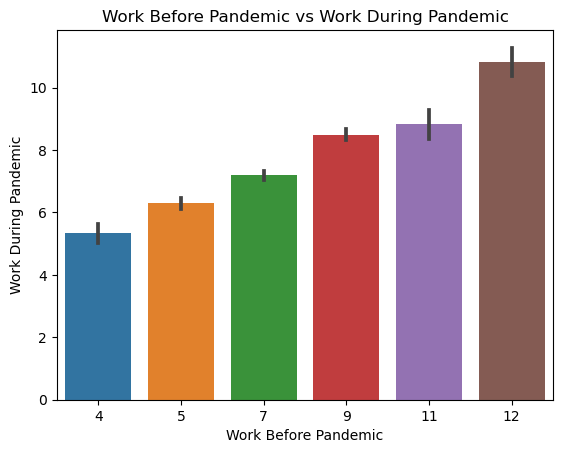

In [14]:
# You should have at least 2 visualizations that have data from more than one source (meaning, if you have 3 tables, you 
# must have visualizations that span across 2 of the tables – you are also welcome to use your consolidated dataset that you
# created in the previous step, if you do that, you have met this requirement)

# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Using seaborn and the barplot() function to graph a bar plot of columns people working before the pandemic, and working 
# during. The bar graph shows that most people in this dataset who worked before the pandemic, did not lose there job during
# the pandemic and continued to work through most of the pandemic.
sns.barplot(x='work_before_pand', y='work_during_pand', data=final_df)
plt.title('Work Before Pandemic vs Work During Pandemic')
plt.xlabel('Work Before Pandemic')
plt.ylabel('Work During Pandemic')
plt.show()

## Visualization #2

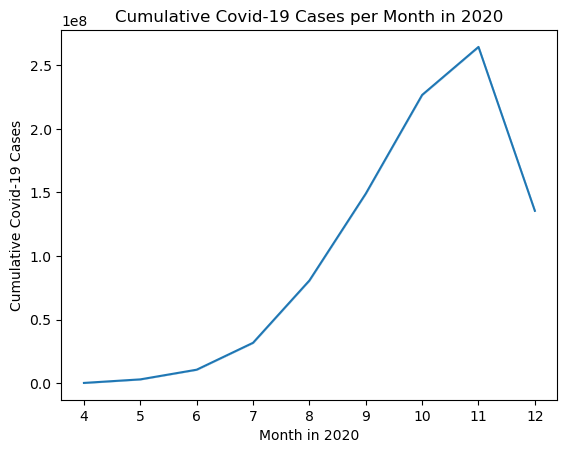

In [15]:
# Using the lineplot() function to compare the columns "month" which is the months 1-12 in 2020 and "cases_cum" which is the
# cumulative cases of covid-19 for 2020. This graph shows that covid-19 did spread more up till November, then the cases 
# dropped in December to the same amount of how they were in September.
sns.lineplot(x='month', y='cases_cum', data=final_df)
plt.title('Cumulative Covid-19 Cases per Month in 2020')
plt.xlabel('Month in 2020')
plt.ylabel('Cumulative Covid-19 Cases')
plt.show()

## Visualization #3

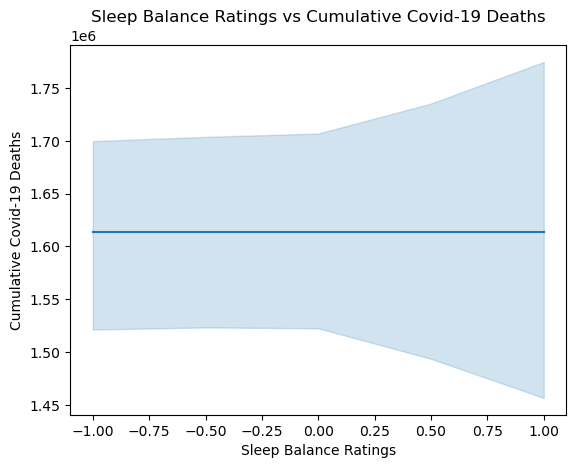

In [21]:
# Using the lineplot() function again to see if there is a correlation between two dataset columns. This specific graph is
# using data from my flat file, the column "sleep_bal" and from the api, the "deaths_cum" column. The line plot shows that
# the balance of sleep a person rated during the pandemic was not correlated with the covid-19 cumulative deaths.
sns.lineplot(x='sleep_bal', y='deaths_cum', data=final_df)
plt.title('Sleep Balance Ratings vs Cumulative Covid-19 Deaths')
plt.xlabel('Sleep Balance Ratings')
plt.ylabel('Cumulative Covid-19 Deaths')
plt.show()

## Visualization #4

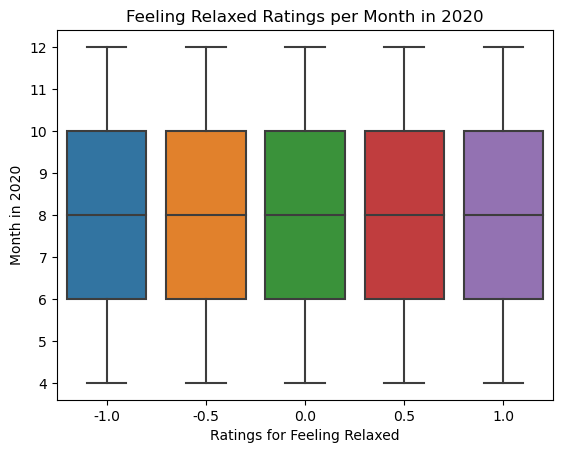

In [22]:
# This next graph uses the boxplot() function to analysis between two different datasets. This graph will be using the data
# from the flat file column "relaxed", and the api column "month" to see if there is a correlation. It shows an even amount
# of ratings for how relaxed the person felt during each month of the pandemic and a normal distribution for all boxplots. 
sns.boxplot(x='relaxed', y='month', data=final_df)
plt.title('Feeling Relaxed Ratings per Month in 2020')
plt.xlabel('Ratings for Feeling Relaxed')
plt.ylabel('Month in 2020')
plt.show()

# Visualization #5

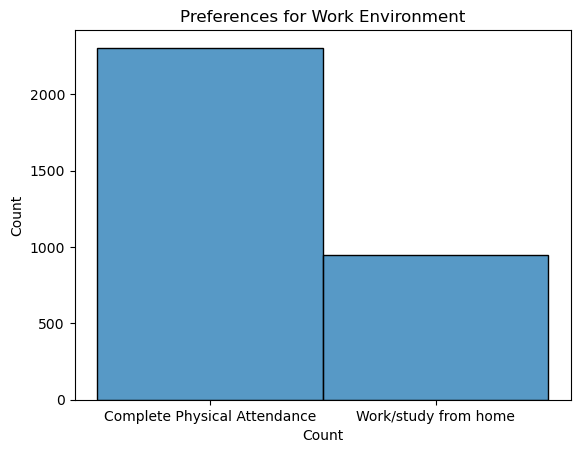

In [23]:
# Using the histplot() seaborn function to plot the column "prefer" to see whether people prefer to work from home during
# the pandemic or to return to complete physical attendance. This histogram shows that majority of people prefer to work
# in person and away from home.
sns.histplot(x='prefer', data=final_df)
plt.title('Preferences for Work Environment')
plt.xlabel('Count')
plt.show()

# 250-500 word summary of what you learned and a summary of the ethical implications

In [ ]:
# The first visualization data is good for my analysis of stress during the pandemic since I assume those who worked were 
# affected by the pandemic more since they had to completely change their normal routine and go remote. I think it is 
# important to note how many people in this google forms dataset continued to work during the pandemic since my analysis is 
# looking at the stress the pandemic caused.  The second graph was the line plot comparing the cases cumulative per month 
# for the year 2020. I chose these two variables to see if there were any drops in covid-19 cases in certain months to 
# compare in another graph if there is a correlation between stress and the peak of the most covid cases in the month of 
# November with a drop in covid cases in December. The third visualization is a line plot if cumulative deaths of covid had 
# a correlation in people negatively rating their sleep balance. I was expecting to see a correlation in sleep balance and 
# having that mostly be rated in the negative, but this graph shows that there was an even number of ratings and no 
# correlation with the cumulative covid deaths. The fourth visualization of the boxplots went over how relaxed someone was 
# feeling during the lockdown. Again, there was no correlation between more negative ratings in feeling relaxed with the 
# covid-19 pandemic. The ratings were even between feeling not so relaxed, and feeling relaxed, or no change at all. The 
# fifth visualization, the histogram showing the column “prefer” and whether someone preferred to work from home or return 
# to in person away from home really surprised me. I was expecting either it was going to be an even tie between the two or 
# that more people were going to realize they can work from home after all and enjoy not commuting. I chose this variable to
# analyze as I think it is important to show after my other graphs that didn’t have any correlations shown in sleep balance 
# and feeling relaxed ratings with the covid-19 lockdown. This histogram is reinforcing as well showing that despite getting
# a feel of working from home, people still preferred to return to their jobs away from home. Overall, I learned that my 
# analysis of showing whether the covid-19 pandemic caused an extreme increase in stress is being proven untrue. At least 
# for the country of India, there was no significant difference in stress and feeling relaxed during the 2020 lockdown.

# There were many ethical implications with my project topic. Most covid datasets use contact tracing which I am sure says 
# our information is protected, but there is not a true way to confirm and prove if it is protected. Also, covid data can be
# used to misinform and lead to potential deaths if not properly used. For ethical implications cleansing the data, the 
# transformations on the datasets will not lead to unethical implications since I kept the actual data itself the same. Most
# of my transformations were condensing the datasets themselves like removing columns that I did not need at all for my 
# analysis. But the numbers for covid cases per month, cumulative cases and deaths remained the same.